## 1. Import necessary packages

For this exercise we need

* pandas
* train_test_split
* LogisticRegression
* pyplot from matplotlib
* KNeighborsClassifier
* LogisticRegressionClassifier
* RandomForestClassifier
* DummyClassifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings

warnings.filterwarnings('ignore')

## 2. Load and prepare the dataset
* Load the training data into a dataframe named df_train_data 

In [2]:
train_df = pd.read_csv('data/shuttle_train.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43500 entries, 0 to 43499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   time     43500 non-null  int64
 1   attrib2  43500 non-null  int64
 2   attrib3  43500 non-null  int64
 3   attrib4  43500 non-null  int64
 4   attrib5  43500 non-null  int64
 5   attrib6  43500 non-null  int64
 6   attrib7  43500 non-null  int64
 7   attrib8  43500 non-null  int64
 8   attrib9  43500 non-null  int64
 9   class    43500 non-null  int64
dtypes: int64(10)
memory usage: 3.3 MB


In [4]:
train_df.head()

,time,attrib2,attrib3,attrib4,attrib5,attrib6,attrib7,attrib8,attrib9,class
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1


In [5]:
train_df.describe()

,time,attrib2,attrib3,attrib4,attrib5,attrib6,attrib7,attrib8,attrib9,class
count,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000
mean,48.249747,-0.205126,85.341563,0.262736,34.528782,1.298276,37.074552,50.899862,13.964598,1.700529
std,12.252618,78.142770,8.908602,41.004131,21.703409,179.486760,13.135557,21.463250,25.648404,1.354648
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-13839.000000,-48.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,79.000000,0.000000,26.000000,-5.000000,31.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000,1.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,13148.000000,105.000000,270.000000,266.000000,7.000000


In [6]:
train_df.isnull()

,time,attrib2,attrib3,attrib4,attrib5,attrib6,attrib7,attrib8,attrib9,class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
43495,False,False,False,False,False,False,False,False,False,False
43496,False,False,False,False,False,False,False,False,False,False
43497,False,False,False,False,False,False,False,False,False,False
43498,False,False,False,False,False,False,False,False,False,False


In [7]:
train_df.isna().sum()*100/train_df.isna().count()

time       0.0
attrib2    0.0
attrib3    0.0
attrib4    0.0
attrib5    0.0
attrib6    0.0
attrib7    0.0
attrib8    0.0
attrib9    0.0
class      0.0
dtype: float64

In [8]:
train_df

,time,attrib2,attrib3,attrib4,attrib5,attrib6,attrib7,attrib8,attrib9,class
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1
...,...,...,...,...,...,...,...,...,...,...
43495,46,5,78,0,46,5,32,32,0,1
43496,37,0,79,-1,10,3,43,69,26,1
43497,48,0,78,3,46,0,30,32,2,1
43498,41,0,79,0,38,-25,38,40,2,1


## 2. Load and prepare the dataset
* Create binary classification problem - rename some class labels
* Create a dataframe of 9 features named X, drop column 9.
* Create a data frame of labels named y, select only column 9.
* Split the data into a training set and a test set.

In [9]:
X = train_df.drop(columns=['class'])
y = train_df['class']

In [10]:
# Split into class 1 and all other classes
y_2 = y.copy()
y_2[y_2 != 1] = 0
y_2[y_2 == 1] = 1

In [11]:
y_2.value_counts()

1    34108
0     9392
Name: class, dtype: int64

## 3. Create the model
* Instantiate a Logistic Regression classifier with a lbfgs solver.
* Fit the classifier to the data.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2, random_state=42)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 4. Calculate Accuracy
* Calculate and print the accuracy of the model on the test data.

In [13]:
lr.score(X_test, y_test)

0.9302068965517242

## 5. Dummy Classifier
* Use the dummy classifier to calculate the accuracy of a purely random chance.
* Compare this result to the result of the logistic regression classifier above. What does this result tell you?

In [14]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7842758620689655

## 6. Confusion Matrix
* Print the confusion matrix.

In [15]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[8261  268]
 [ 491 1855]]


## 7. Plot a nicer confusion matrix (optional)
* Use the plot_confusion_matrix function from above to plot a nicer looking confusion matrix.

In [16]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

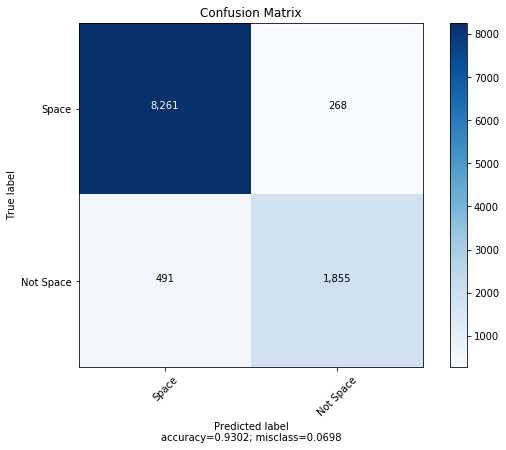

In [17]:
plot_confusion_matrix(cm=confusion, target_names = ['Space', 'Not Space'], title = 'Confusion Matrix',normalize=False)

## 8. Calculate Metrics
* Print the F1, F beta, precision, recall and accuracy scores.

In [18]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.93
Precision score: 0.94
Recall score: 0.97
F1 score: 0.96
Fbeta score favoring precision: 0.95
FBeta score favoring recall: 0.96


## 9. Print a classification report

In [19]:
report = classification_report(y_test, predictions, target_names=['Not Space', 'Space'])
print(report)

              precision    recall  f1-score   support

   Not Space       0.87      0.79      0.83      2346
       Space       0.94      0.97      0.96      8529

    accuracy                           0.93     10875
   macro avg       0.91      0.88      0.89     10875
weighted avg       0.93      0.93      0.93     10875



## 10. Plot ROC Curve and AUC
Caculate AUC and plot the curve.


In [20]:
probs = lr.predict_proba(X_test)[:, 1]
print(probs[1:30])

[3.65330154e-09 9.79581608e-01 9.81616357e-01 9.99834305e-01
 9.51252399e-01 9.99288240e-01 9.98856968e-01 9.94448742e-01
 5.91828435e-01 9.87614912e-01 9.92440856e-01 2.26988163e-10
 9.94216338e-01 9.74125139e-01 8.74259930e-01 9.99113472e-01
 9.12422651e-01 9.99083717e-01 9.93249227e-01 9.99922078e-01
 2.06374535e-10 9.88222837e-01 1.04990964e-02 9.48377510e-01
 9.99997679e-01 5.04374544e-08 9.97585748e-01 6.31939050e-01
 9.11653469e-01]


In [21]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr[1:30])
print(tpr[1:30])
print(thresholds[1:30])

[0.         0.         0.00042626 0.00042626 0.00085251 0.00085251
 0.00127877 0.00127877 0.00170503 0.00170503 0.00213129 0.00213129
 0.00255754 0.00255754 0.0029838  0.0029838  0.00341006 0.00341006
 0.00383632 0.00383632 0.00426257 0.00426257 0.00468883 0.00468883
 0.00511509 0.00511509 0.00554135 0.00554135 0.0059676 ]
[1.17247040e-04 1.53593622e-02 1.53593622e-02 7.31621527e-02
 7.31621527e-02 7.82037754e-02 7.82037754e-02 8.13694454e-02
 8.13694454e-02 2.28748974e-01 2.28748974e-01 2.33907844e-01
 2.33907844e-01 2.47274006e-01 2.47274006e-01 2.68964709e-01
 2.68964709e-01 2.71309649e-01 2.71309649e-01 3.13987572e-01
 3.13987572e-01 4.81416344e-01 4.81416344e-01 5.69703365e-01
 5.69703365e-01 5.95614961e-01 5.95614961e-01 5.98311643e-01
 5.98311643e-01]
[1.         0.99997099 0.99997092 0.99986405 0.99986399 0.99985282
 0.99985266 0.99984187 0.99984158 0.99921651 0.99921484 0.99917117
 0.99917101 0.99908835 0.99908757 0.99889879 0.9988951  0.99884204
 0.99884085 0.99818809 0.99818

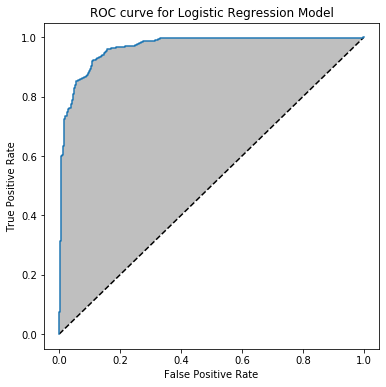

In [22]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

In [23]:
auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

Area under the ROC curve: 0.969


## 11. Plot Precision-Recall Curve
* Plot the precision-recall curve for the model above.
* Find the best value for C in the Logistic Regression Classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.


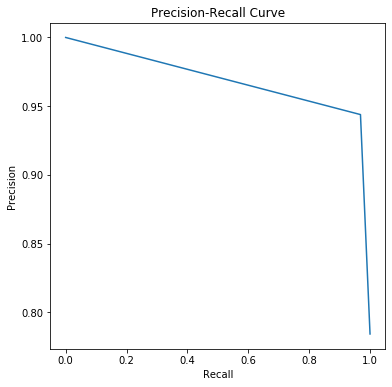

In [24]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## 12. Cross Validation
* Perform 5-fold cross validation for a Logistic Regression Classifier. Print the 5 accuracy scores and the mean validation score.


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2, random_state=42)
clf = LogisticRegression(solver='lbfgs')
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.94360153 0.93011494 0.94022989 0.93915709 0.93302682]
Mean cross validatiion score: 0.937


## 13. Is this really linear?
* Our linear classifier is not giving us accuracy better than the dummy classifier. Suppose that the data was not linearly separable? Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the Logistic Regression from above? What does that tell you about the data?


In [29]:
knn = KNeighborsClassifier(n_neighbors=7)

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [34]:
knn.score(X_test, y_test)

0.9981609195402299

## 14. Random Forest
* Next, instantiate and fit a RandomForestClassifier and calculate the accuracy of that model.

In [35]:
rfc = RandomForestClassifier()

In [36]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
rfc.score(X_test, y_test)

1.0